#***ARIMA***

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/BNB.csv')

#8:1:1

In [ ]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 8:1:1
train_size = int(len(prices) * 0.8)
test_size = int(len(prices) * 0.1)
val_size = len(prices) - train_size - test_size

train, test, val = prices[:train_size], prices[train_size:train_size+test_size], prices[train_size+test_size:]

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 8737.906038858464
MAE: 86.71919678179532
RMSE: 93.47676737488553
MAPE: 37.990093364617024


30-day predictions: [330.90608545 331.80489753 331.65894351 329.93121356 331.32235225
 330.72731251 330.68385974 330.74236926 330.91216895 330.71585396
 330.83229309 330.81893637 330.81058455 330.79641933 330.82172414
 330.8022621  330.80744023 330.80786687 330.80879812 330.80580845
 330.80873694 330.80754318 330.80768269 330.80763581 330.80796023
 330.80755463 330.80777864 330.80772162 330.80772705 330.80769435]
60-day predictions: [330.90608545 331.80489753 331.65894351 329.93121356 331.32235225
 330.72731251 330.68385974 330.74236926 330.91216895 330.71585396
 330.83229309 330.81893637 330.81058455 330.79641933 330.82172414
 330.8022621  330.80744023 330.80786687 330.80879812 330.80580845
 330.80873694 330.80754318 330.80768269 330.80763581 330.80796023
 330.80755463 330.80777864 330.80772162 330.80772705 330.80769435
 330.80774666 330.80770955 330.80772341 330.80772133 330.80772455
 330.80771822 330.80772383 330.80772109 330.80772174 330.80772138
 330.80772211 330.80772132 330.8077

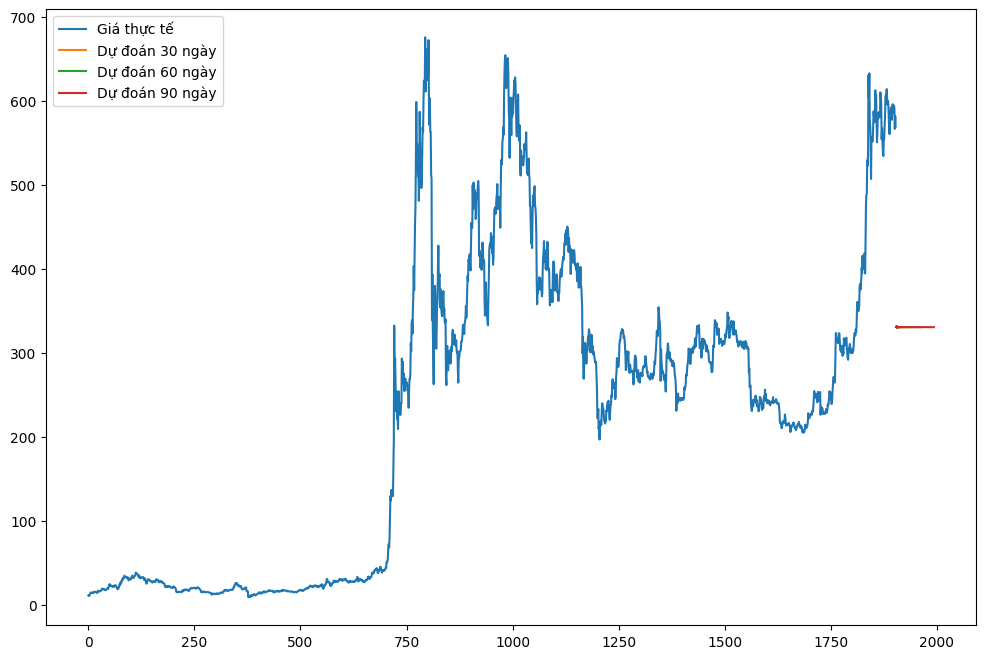

In [ ]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

print("30-day predictions:", pred_30)
print("60-day predictions:", pred_60)
print("90-day predictions:", pred_90)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 8))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày')
plt.legend()
plt.show()

#7:2:1

In [ ]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 7:2:1
train_size = int(len(prices) * 0.7)
test_size = int(len(prices) * 0.2)
val_size = len(prices) - train_size - test_size

train, test, val = prices[:train_size], prices[train_size:train_size+test_size], prices[train_size+test_size:]

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 1737.9549996774865
MAE: 38.05661487668338
RMSE: 41.68878745751052
MAPE: 14.452789733739365


30-day predictions: [270.58476617 270.80570834 271.15858688 271.04624714 271.05375427
 271.05491103 271.02171093 270.9821368  270.99841104 270.98945854
 270.98906558 270.99339156 270.99718165 270.99498197 270.99702823
 270.99689293 270.99642178 270.99612999 270.99639962 270.9960494
 270.99611408 270.99614994 270.9961645  270.9961351  270.99618673
 270.99617043 270.9961708  270.9961709  270.99617369 270.99616685]
60-day predictions: [270.58476617 270.80570834 271.15858688 271.04624714 271.05375427
 271.05491103 271.02171093 270.9821368  270.99841104 270.98945854
 270.98906558 270.99339156 270.99718165 270.99498197 270.99702823
 270.99689293 270.99642178 270.99612999 270.99639962 270.9960494
 270.99611408 270.99614994 270.9961645  270.9961351  270.99618673
 270.99617043 270.9961708  270.9961709  270.99617369 270.99616685
 270.99617004 270.99616915 270.99616908 270.99616885 270.99616968
 270.99616914 270.99616938 270.99616937 270.99616939 270.99616929
 270.99616938 270.99616933 270.996169

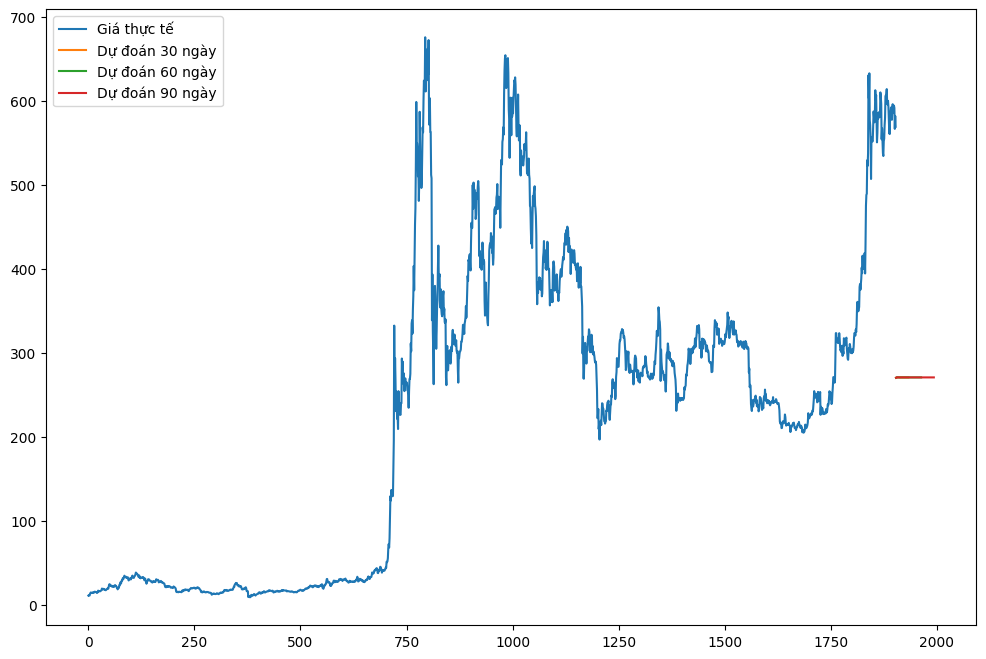

In [ ]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

print("30-day predictions:", pred_30)
print("60-day predictions:", pred_60)
print("90-day predictions:", pred_90)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 8))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày')
plt.legend()
plt.show()

#6:2:2

In [ ]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 6:2:2
train_size = int(len(prices) * 0.6)
test_size = int(len(prices) * 0.2)
val_size = len(prices) - train_size - test_size

train, test, val = prices[:train_size], prices[train_size:train_size+test_size], prices[train_size+test_size:]

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 16611.070302951848
MAE: 122.64623995697256
RMSE: 128.88394121438034
MAPE: 44.18173227781328


30-day predictions: [420.34937722 417.09575298 416.64111949 417.78446904 417.06146662
 416.77857255 417.25623777 417.19334099 417.06289035 417.19951914
 417.2093835  417.14697045 417.17215544 417.18312579 417.16162386
 417.16504645 417.17206424 417.16675967 417.16657545 417.16951026
 417.16837806 417.16777288 417.16865633 417.16847139 417.16812812
 417.16836036 417.1683786  417.16825343 417.16830759 417.16833922]
60-day predictions: [420.34937722 417.09575298 416.64111949 417.78446904 417.06146662
 416.77857255 417.25623777 417.19334099 417.06289035 417.19951914
 417.2093835  417.14697045 417.17215544 417.18312579 417.16162386
 417.16504645 417.17206424 417.16675967 417.16657545 417.16951026
 417.16837806 417.16777288 417.16865633 417.16847139 417.16812812
 417.16836036 417.1683786  417.16825343 417.16830759 417.16833922
 417.16830062 417.16830816 417.16832325 417.1683125  417.16831107
 417.16831657 417.16831417 417.16831273 417.1683145  417.16831423
 417.16831356 417.16831405 417.1683

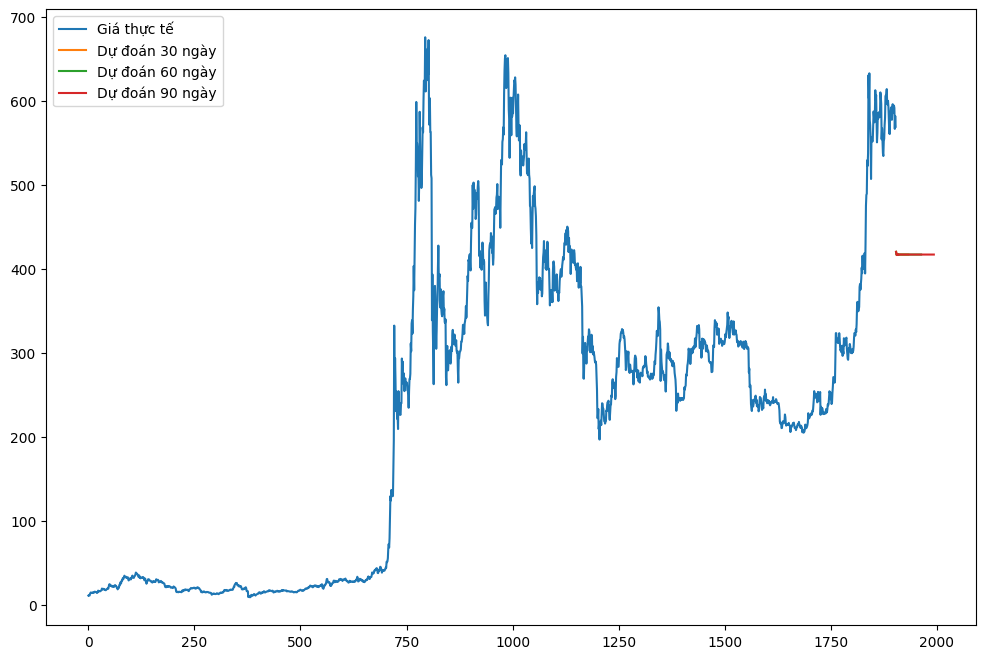

In [ ]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

print("30-day predictions:", pred_30)
print("60-day predictions:", pred_60)
print("90-day predictions:", pred_90)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 8))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày')
plt.legend()
plt.show()